In [18]:
import os 
from locscale.include.emmer.ndimage.map_utils import load_map
import matplotlib.pyplot as plt
import seaborn as sns

parent_output_folder = "/home/abharadwaj1/papers/elife_paper/figure_information/data/epoch_evolution_emmernet/emd_0282_montecarlo"
epochs = [2,4,6,8,10,12,14]
epoch_folders = [os.path.join(parent_output_folder, f"epoch_{i}") for i in epochs]
mask_path = os.path.join(parent_output_folder, f"epoch_{epochs[-1]}", f"output_map_epoch_{epochs[-1]}_mean.mrc")
mask, apix = load_map(mask_path)
mask_binarised = (mask >= 0.10).astype(bool)


In [19]:
import numpy as np
variance_maps_epochs = []
for i in epochs:
    epoch_folder = os.path.join(parent_output_folder, f"epoch_{i}")
    variance_map_path = os.path.join(epoch_folder, f"output_map_epoch_{i}_var.mrc")
    variance_map, apix = load_map(variance_map_path)
    variance_map_array = variance_map[mask_binarised]
    variance_map_sample = np.random.choice(variance_map_array, size=3000)
    variance_maps_epochs.append(variance_map_sample)
    

In [25]:
probabilities_maps_epochs = []
for i in epochs:
    epoch_folder = os.path.join(parent_output_folder, f"epoch_{i}")
    probabilities_map_path = os.path.join(epoch_folder, f"hallucinations_probabilities_map.mrc")
    probabilities_map, apix = load_map(probabilities_map_path)
    probabilities_map_array = probabilities_map[mask_binarised]
    probabilities_map_sample = np.random.choice(probabilities_map_array, size=30000)
    probabilities_maps_epochs.append(probabilities_map_sample)
    

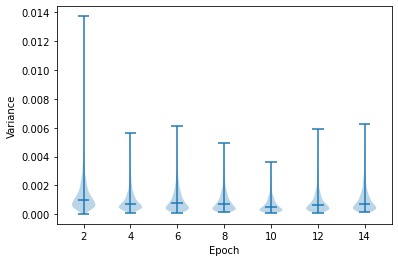

In [32]:
plt.violinplot(variance_maps_epochs, showmeans=False, showmedians=True, showextrema=True);
#plt.ylim(0, 0.005)
plt.ylabel("Variance")
plt.xlabel("Epoch")
plt.xticks(np.arange(1, len(epochs)+1), epochs);


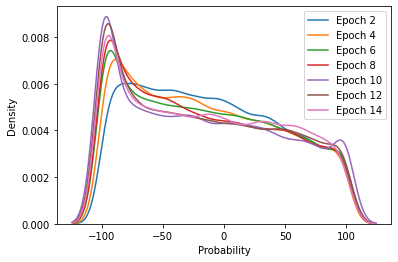

In [30]:
import seaborn as sns
sns.kdeplot(probabilities_maps_epochs[0], fill=False, label="Epoch 2")
sns.kdeplot(probabilities_maps_epochs[1], fill=False, label="Epoch 4")
sns.kdeplot(probabilities_maps_epochs[2], fill=False, label="Epoch 6")
sns.kdeplot(probabilities_maps_epochs[3], fill=False, label="Epoch 8")
sns.kdeplot(probabilities_maps_epochs[4], fill=False, label="Epoch 10")
sns.kdeplot(probabilities_maps_epochs[5], fill=False, label="Epoch 12")
sns.kdeplot(probabilities_maps_epochs[6], fill=False, label="Epoch 14")
plt.xlabel("Probability")
plt.ylabel("Density")
plt.legend()
